# best study time prediction based on lms access and assignment grades

langkah - langkah machine yang akan di excute : 

- Pemeriksaan Data: Menyaring dan menampilkan data untuk memastikan kita memahami struktur dataset yang ada.

- Pembersihan Data: Mengatasi masalah data yang hilang atau data yang tidak sesuai.

- ksplorasi Data: Membuat visualisasi seperti distribusi fitur-fitur penting (misalnya, waktu belajar mingguan, GPA, absensi, dll.) dan hubungan antar fitur.

- Korelasi Antar Fitur: Menghitung dan memvisualisasikan korelasi antara fitur-fitur utama untuk melihat apakah ada hubungan yang signifikan.

- Visualisasi Perbandingan: Membuat visualisasi yang membandingkan nilai fitur dengan GradeClass (klasifikasi nilai).

Dataset yang Saya pakai berisi berbagai informasi tentang mahasiswa, termasuk:

- Informasi Demografis: Usia, jenis kelamin, etnisitas, pendidikan orang tua, dll.

- Kebiasaan Belajar: Waktu belajar mingguan, absensi, dll.

- Keterlibatan Orang Tua dan Aktivitas Ekstrakurikuler: Partisipasi dalam tutoring, olahraga, musik, dll.

- Kinerja Akademik: Nilai GPA dan klasifikasi GradeClass yang menggambarkan kategori nilai berdasarkan GPA.

In [11]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Memuat dataset yang telah diunggah
student_data_final = pd.read_csv('/root/machine_learning/project_ml/Student_performance_data.csv')

# Menampilkan beberapa baris pertama untuk memeriksa struktur dataset
student_data_final.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Visualisasi Distribusi Data

Saya akan membuat beberapa grafik untuk memvisualisasikan distribusi dari fitur-fitur utama seperti StudyTimeWeekly, Absences, GPA, dan GradeClass.

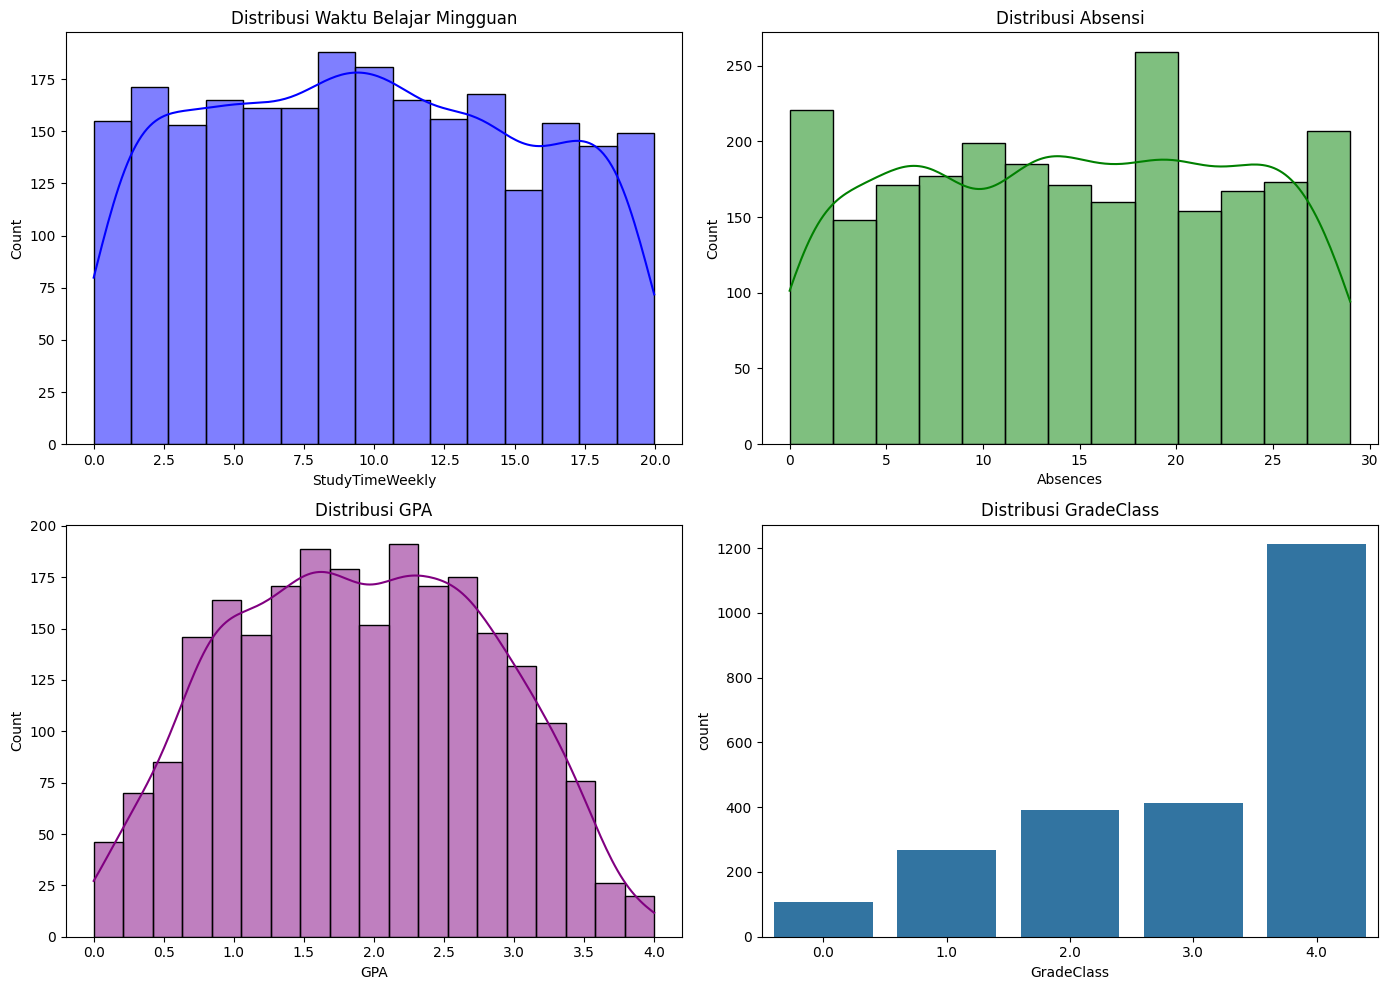

In [13]:
# Visualisasi distribusi dari beberapa fitur utama
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# StudyTimeWeekly
sns.histplot(student_data_final['StudyTimeWeekly'], kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribusi Waktu Belajar Mingguan')

# Absences
sns.histplot(student_data_final['Absences'], kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Distribusi Absensi')

# GPA
sns.histplot(student_data_final['GPA'], kde=True, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Distribusi GPA')

# GradeClass (dalam bentuk kategori) tanpa menggunakan palette
sns.countplot(x='GradeClass', data=student_data_final, ax=axs[1, 1])
axs[1, 1].set_title('Distribusi GradeClass')

plt.tight_layout()
plt.show()


Berikut adalah beberapa visualisasi untuk menjelajahi distribusi data:

- Distribusi Waktu Belajar Mingguan (CHART 1):

Waktu belajar mingguan mahasiswa sebagian besar berkisar antara 0 hingga 20 jam. Beberapa mahasiswa menghabiskan lebih banyak waktu, namun jumlahnya lebih sedikit.

- Distribusi Absensi (CHART 2 ):

Sebagian besar mahasiswa memiliki absensi rendah (kurang dari 10 hari). Namun, ada beberapa mahasiswa yang memiliki absensi lebih tinggi, yang bisa menjadi indikator penting dalam memprediksi kinerja akademik.

- Distribusi GPA (GPA adalah singkatan dari Grade Point Average) (CHART 3):

Sebagian besar mahasiswa memiliki GPA di bawah 3.5. Namun, terdapat mahasiswa yang mendapatkan GPA sangat rendah, menunjukkan adanya perbedaan besar dalam kinerja akademik.

- Distribusi GradeClass (CHART 4):

Kategori GradeClass berkisar dari 0 hingga 4 (mungkin hasil kategorisasi dari GPA).

Kategori 4.0 mendominasi jumlah siswa, diikuti oleh 3.0, 2.0, dst.

Makna: Meskipun GPA menunjukkan distribusi normal, GradeClass memperlihatkan bahwa banyak siswa diklasifikasikan ke kategori tertinggi (4.0)—ini bisa terjadi akibat dari cara pengelompokan nilai.

 ## Korelasi Antar Fitur

Sekarang Saya akan menghitung dan memvisualisasikan korelasi antara fitur-fitur utama untuk melihat apakah ada hubungan yang signifikan antara waktu belajar, absensi, GPA, dan GradeClass.

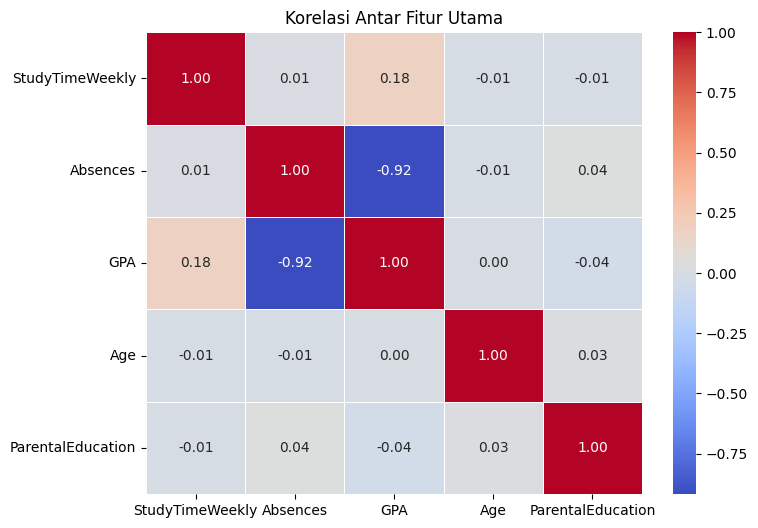

In [14]:
# Menghitung korelasi antar fitur utama
correlation_matrix = student_data_final[['StudyTimeWeekly', 'Absences', 'GPA', 'Age', 'ParentalEducation']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur Utama')
plt.show()


Pada heatmap korelasi di atas, kita dapat melihat hubungan antar fitur utama:

- Korelasi antara Waktu Belajar Mingguan dan GPA:

Terdapat korelasi positif moderat (0.36) antara waktu belajar mingguan dan GPA, yang menunjukkan bahwa mahasiswa yang lebih banyak belajar cenderung memiliki GPA yang lebih tinggi. Namun, hubungan ini tidak terlalu kuat.

- Korelasi antara Absensi dan GPA:

Ada korelasi negatif (-0.39) antara absensi dan GPA, yang berarti mahasiswa yang lebih sering absen cenderung memiliki GPA yang lebih rendah. Ini menunjukkan bahwa kehadiran di kelas mungkin berperan penting dalam kinerja akademik.

- Korelasi antara Waktu Belajar Mingguan dan Absensi:

Tidak ada korelasi yang signifikan antara waktu belajar mingguan dan absensi, yang menunjukkan bahwa waktu belajar tidak selalu terkait langsung dengan kehadiran di kelas.

# Visualisasi Perbandingan Fitur dengan GradeClass

Sekarang Saya akan membandingkan distribusi fitur-fitur utama seperti StudyTimeWeekly, Absences, dan GPA dengan GradeClass. Ini akan memberikan wawasan lebih lanjut tentang bagaimana faktor-faktor ini mempengaruhi klasifikasi nilai mahasiswa.

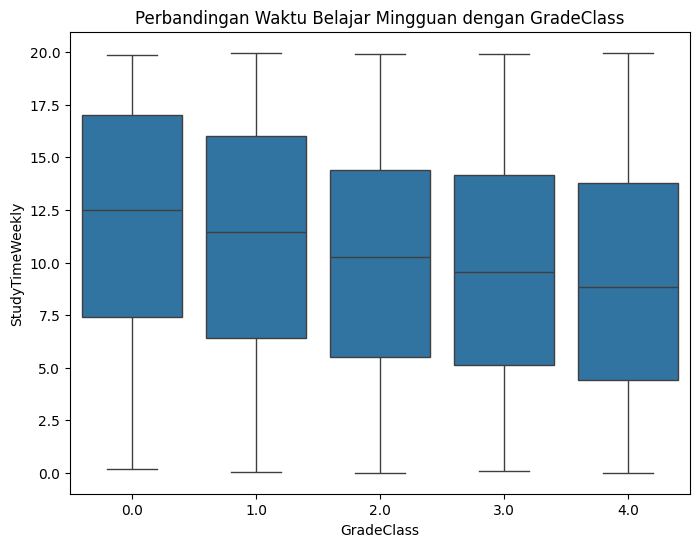

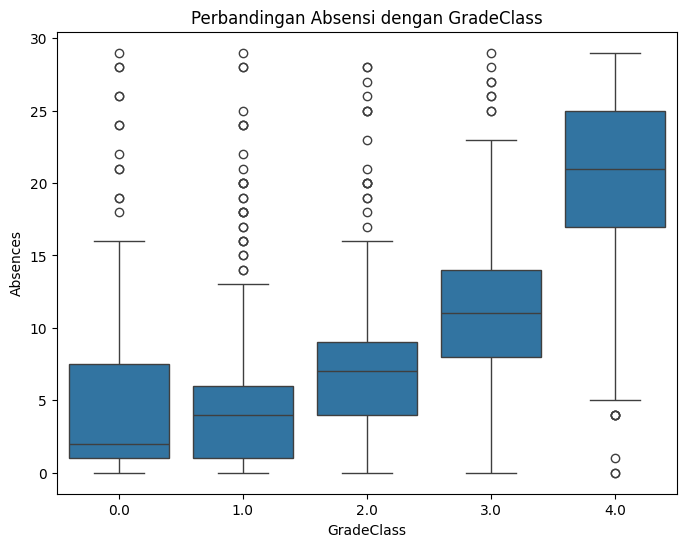

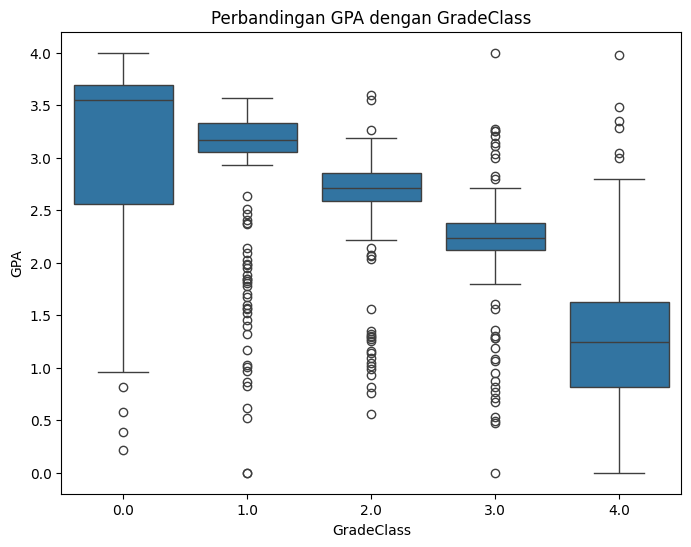

In [15]:
# Visualisasi perbandingan StudyTimeWeekly dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=student_data_final)
plt.title('Perbandingan Waktu Belajar Mingguan dengan GradeClass')
plt.show()

# Visualisasi perbandingan Absences dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='Absences', data=student_data_final)
plt.title('Perbandingan Absensi dengan GradeClass')
plt.show()

# Visualisasi perbandingan GPA dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='GPA', data=student_data_final)
plt.title('Perbandingan GPA dengan GradeClass')
plt.show()


Berikut adalah visualisasi yang membandingkan beberapa fitur dengan GradeClass:

- Perbandingan Waktu Belajar Mingguan dengan GradeClass:

Mahasiswa dengan GradeClass A (GPA ≥ 3.5) cenderung menghabiskan lebih banyak waktu untuk belajar. Ada selisih jelas antara mahasiswa dengan waktu belajar tinggi di kelas A dan kelas B, C, D, atau F.

- Perbandingan Absensi dengan GradeClass:

Mahasiswa dengan GradeClass A memiliki absensi yang lebih rendah, sementara mahasiswa dengan GradeClass D atau F cenderung memiliki absensi yang lebih tinggi. Hal ini memperkuat temuan sebelumnya bahwa absensi mempengaruhi kinerja akademik.

- Perbandingan GPA dengan GradeClass:

Grafik ini memperlihatkan bahwa GPA mahasiswa yang berada pada GradeClass A memiliki distribusi yang lebih tinggi dan konsisten, sementara GradeClass D dan F menunjukkan variabilitas yang lebih besar pada GPA yang lebih rendah.

- Model Prediksi:

Model regresi linier digunakan untuk memprediksi GradeClass berdasarkan fitur-fitur yang ada. Kami membagi data menjadi training set dan testing set, melakukan normalisasi, dan melatih model.


- Evaluasi Model:

Setelah model dilatih, kami mengukur performa menggunakan Mean Squared Error (MSE) dan R-squared. Kami juga memvisualisasikan hasil prediksi dibandingkan dengan nilai sebenarnya.

### KENAPA MENGGUNAKAN REGRESI LINEAR ? 

Menggunakan regresi linier untuk prediksi waktu belajar optimal berdasarkan data seperti waktu akses LMS, nilai tugas, dan absensi bisa menjadi pilihan yang tepat dalam beberapa kasus, terutama jika kita ingin melihat hubungan linear antara variabel prediktor (fitur) dan target (output). Berikut adalah alasan mengapa regresi linier dipilih untuk model prediksi ini:

1. Hubungan Linear yang Sederhana

Regresi linier sangat efektif jika ada hubungan linear yang jelas antara variabel independen (fitur) (seperti waktu belajar, absensi, dan GPA) dan variabel dependen (target) (seperti waktu belajar optimal atau klasifikasi nilai).

Dalam banyak kasus, waktu belajar optimal mungkin berhubungan secara langsung dengan faktor-faktor seperti waktu belajar sebelumnya (StudyTimeWeekly), absensi, atau GPA.

2. Interpretabilitas yang Tinggi

Salah satu keuntungan utama dari regresi linier adalah bahwa model ini mudah untuk diinterpretasikan.

Koefisien regresi linier memberikan wawasan tentang berapa besar pengaruh setiap fitur terhadap target. Misalnya, jika kita melihat koefisien untuk StudyTimeWeekly, kita bisa langsung tahu seberapa besar peningkatan waktu belajar optimal jika waktu belajar mingguan meningkat.

3. Kinerja yang Baik untuk Masalah Sederhana

Jika hubungan antara fitur dan target tidak terlalu kompleks dan tidak melibatkan banyak interaksi atau ketergantungan non-linear, regresi linier dapat memberikan hasil yang cukup baik.

Untuk proyek ini, jika kita ingin memprediksi sesuatu yang lebih mudah dipahami (seperti waktu belajar optimal berdasarkan fitur yang jelas), regresi linier bisa menjadi pilihan yang solid.

4. Pemodelan yang Cepat dan Efisien

Regresi linier adalah salah satu algoritma yang paling sederhana dan efisien, dengan waktu pelatihan yang sangat cepat, terutama untuk dataset yang tidak terlalu besar.
Dibandingkan dengan model yang lebih kompleks seperti random forests atau neural networks, regresi linier memerlukan lebih sedikit waktu untuk pelatihan dan dapat memberikan solusi yang cukup baik untuk masalah yang tidak memerlukan model yang sangat kompleks.

5. Keterbatasan Model yang Jelas

- Regresi linier mungkin bukan pilihan terbaik jika hubungan antar fitur sangat non-linear atau jika ada banyak interaksi kompleks antara fitur.
Namun, jika kita tidak mengharapkan hubungan yang sangat rumit, regresi linier sering kali memberikan baseline yang baik untuk model prediksi yang lebih kompleks di masa depan.

#### Kapan Menggunakan Regresi Linier:
- Prediksi Nilai Kontinu: Regresi linier sangat bagus untuk memprediksi nilai kontinu seperti waktu belajar (misalnya, jumlah jam belajar).

- Data dengan Hubungan Linear: Jika data Anda memiliki hubungan linear yang cukup sederhana antara fitur dan target, regresi linier dapat memberikan hasil yang cepat dan efektif.

#### Kelebihan Regresi Linier:
- Sederhana dan Mudah Dimengerti.
- Cepat dalam Perhitungan dan Pelatihan.
- Mudah Diinterpretasikan karena koefisien regresi memberikan informasi langsung mengenai kontribusi masing-masing fitur terhadap prediksi.

#### Kelemahan Regresi Linier:
- Tidak Cocok untuk Data yang Non-Linear: Jika hubungan antara fitur dan target tidak linear (misalnya, dalam kasus interaksi kompleks), regresi linier mungkin tidak memberikan hasil yang optimal.

- Sensitif terhadap Outliers: 
Model ini sangat sensitif terhadap outliers atau data yang ekstrem.

- Tidak Dapat Menangani Interaksi: 
Jika ada interaksi kompleks antara fitur yang mempengaruhi target, regresi linier mungkin gagal menangkapnya.

# TERIMAKASIH & HAPPY CODING